# ДОМАШНЕЕ ЗАДАНИЕ 3. Классификация текстовых документов

## Вариант

In [1]:
surname = "Минайчев" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


Набор SMS сообщений (sms)

Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer

In [3]:
data_path = "Assignments-master/data/A3_Text_Classification/SMSSpamCollection"

In [4]:
random_state = 123

In [5]:
import warnings
warnings.filterwarnings('ignore') #убираем предупреждения

## Задание 1. Оценка качества классификации текстовых данных

1. Загрузите исходные данные

In [6]:
data = open(data_path, encoding="utf-8")
sms_lines = data.readlines()

Создадим два списка - с классами, и самим текстом

In [7]:
sms_text = []
sms_class = []
for line in sms_lines:
    if line[:1] == 's':
        sms_class.append(line[:4])
        sms_text.append(line[5:-1])
    else:
        sms_class.append(line[:3])
        sms_text.append(line[4:-1])

2. Разбейте загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(sms_text, sms_class, test_size=0.2, random_state = random_state)

3. Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами sklearn для трансформации текстовых документов в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр).

In [9]:
tfidf_transformer = TfidfVectorizer(lowercase=True, use_idf=True, 
                                    ngram_range=(1,1), smooth_idf=False)  # параметры как на семинаре + lowercase по условию                      
tfidf_transformer

TfidfVectorizer(smooth_idf=False)

In [10]:
tfidf_train_vector = tfidf_transformer.fit_transform(x_train)
tfidf_test_vector = tfidf_transformer.transform(x_test)

4. Постройте на обучающем подмножестве следующие модели классификации:
    - K-ближайших соседей ($n=5$)
    - Логистическая регрессия ($C=1$)
    - Наивный Байес: модель Бернулли ($\alpha=1$)
    - Наивный Байес: полиномиальная модель ($\alpha=1$)

4.1 К-ближайших соседей(KNeighbors)

In [11]:
knc_model = KNeighborsClassifier(n_neighbors=5)
knc_model.fit(tfidf_train_vector,y_train)

KNeighborsClassifier()

4.2 Логистическая регрессия

В условии изначально написано использовать random_state=123 для всех моделей, для логистической регрессии поздей написано использовать random_state=12345, это учитывать не буду, используем rs = 123

In [12]:
logr_model = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1,
                                solver="lbfgs", random_state=123) # параметры согласно условию
logr_model.fit(tfidf_train_vector, y_train)

LogisticRegression(C=1, random_state=123)

4.3 Наивный Байес: модель Бернулли

In [13]:
count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   lowercase=True, binary=True) # преобразуем вектор в бинарный согласно условию

train_binary_vector = count_vectorizer.fit_transform(x_train)
test_binary_vector = count_vectorizer.transform(x_test)

In [14]:
bnb_model = BernoulliNB(alpha=1, binarize=None) #binarize = none, т.к вектор уже бинарный
bnb_model.fit(train_binary_vector, y_train)

BernoulliNB(alpha=1, binarize=None)

4.4 Наивный Байес: полиномиальная модель

In [15]:
mnb_model = MultinomialNB(alpha=1)
mnb_model.fit(tfidf_train_vector, y_train)

MultinomialNB(alpha=1)

5. Определите качество классификации на тестовом подмножестве (Balanced-Accuracy, R, P, F1)

5.1 К-ближайших соседей(KNeighbors)

In [16]:
y_pred = knc_model.predict(tfidf_test_vector) # предскажем значения для y_test
accuracy_knc = balanced_accuracy_score(y_test, y_pred)
recall_knc = recall_score(y_test, y_pred, pos_label = 'spam')
precision_knc = precision_score(y_test, y_pred, pos_label = 'spam')
f1_knc = f1_score(y_test, y_pred, pos_label = 'spam')
print('Модель К-ближайших соседей:')
print('Balanced accuracy score:', accuracy_knc)
print('Recall score:', recall_knc)
print('Precision score:', precision_knc)
print('F1 score:', f1_knc)

Модель К-ближайших соседей:
Balanced accuracy score: 0.6698113207547169
Recall score: 0.33962264150943394
Precision score: 1.0
F1 score: 0.5070422535211268


5.2 Логистическая регрессия

In [17]:
y_pred = logr_model.predict(tfidf_test_vector) # предскажем значения для y_test
accuracy_logr = balanced_accuracy_score(y_test, y_pred)
recall_logr = recall_score(y_test, y_pred, pos_label = 'spam')
precision_logr = precision_score(y_test, y_pred, pos_label = 'spam')
f1_logr = f1_score(y_test, y_pred, pos_label = 'spam')
print('Логистическая регрессия:')
print('Balanced accuracy score:', accuracy_logr)
print('Recall score:', recall_logr)
print('Precision score:', precision_logr)
print('F1 score:', f1_logr)

Логистическая регрессия:
Balanced accuracy score: 0.914048314518039
Recall score: 0.8301886792452831
Precision score: 0.9850746268656716
F1 score: 0.9010238907849829


5.3 Наивный Байес: модель Бернулли

In [18]:
y_pred = bnb_model.predict(test_binary_vector) # предскажем значения для y_test
accuracy_bnb = balanced_accuracy_score(y_test, y_pred)
recall_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_bnb = f1_score(y_test, y_pred, pos_label = 'spam')
print('Наивный Байес: модель Бернулли:')
print('Balanced accuracy score:', accuracy_bnb)
print('Recall score:', recall_bnb)
print('Precision score:', precision_bnb)
print('F1 score:', f1_bnb)

Наивный Байес: модель Бернулли:
Balanced accuracy score: 0.9491625220388937
Recall score: 0.89937106918239
Precision score: 0.9930555555555556
F1 score: 0.943894389438944


5.4 Наивный Байес: полиномиальная модель

In [19]:
y_pred = mnb_model.predict(tfidf_test_vector) # предскажем значения для y_test
accuracy_mnb = balanced_accuracy_score(y_test, y_pred)
recall_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_mnb = f1_score(y_test, y_pred, pos_label = 'spam')
print('Наивный Байес: полиномиальная модель:')
print('Balanced accuracy score:', accuracy_mnb)
print('Recall score:', recall_mnb)
print('Precision score:', precision_mnb)
print('F1 score:', f1_mnb)

Наивный Байес: полиномиальная модель:
Balanced accuracy score: 0.8742138364779874
Recall score: 0.7484276729559748
Precision score: 1.0
F1 score: 0.856115107913669


6 Определите время обучения и предсказания

6.1 К-ближайших соседей(KNeighbors)

In [20]:
start_fit = time.perf_counter()
knc_model.fit(tfidf_train_vector,y_train)
end_fit = time.perf_counter()
fit_time_knc = end_fit - start_fit
start_predict = time.perf_counter()
mnb_model.predict(tfidf_test_vector)
end_predict = time.perf_counter()
predict_time_knc = end_predict - start_predict
print('Модель К-ближайших соседей:')
print('Время обучения:', fit_time_knc, "с")
print('Время предсказания:', predict_time_knc, "с")

Модель К-ближайших соседей:
Время обучения: 0.00422080000000058 с
Время предсказания: 0.0006477999999994211 с


6.2 Логистическая регрессия

In [21]:
start_fit = time.perf_counter()
logr_model.fit(tfidf_train_vector,y_train)
end_fit = time.perf_counter()
fit_time_logr = end_fit - start_fit
start_predict = time.perf_counter()
logr_model.predict(tfidf_test_vector)
end_predict = time.perf_counter()
predict_time_logr = end_predict - start_predict
print('Логистическая регрессия:')
print('Время обучения:', fit_time_logr, "с")
print('Время предсказания:', predict_time_logr, "с")

Логистическая регрессия:
Время обучения: 0.08730130000000003 с
Время предсказания: 0.00044709999999881234 с


6.3 Наивный Байес: модель Бернулли

In [22]:
start_fit = time.perf_counter()
bnb_model.fit(train_binary_vector, y_train)
end_fit = time.perf_counter()
fit_time_bnb = end_fit - start_fit
start_predict = time.perf_counter()
bnb_model.predict(test_binary_vector)
end_predict = time.perf_counter()
predict_time_bnb = end_predict - start_predict
print('Наивный Байес: модель Бернулли:')
print('Время обучения:', fit_time_bnb, "с")
print('Время предсказания:', predict_time_bnb, "с")

Наивный Байес: модель Бернулли:
Время обучения: 0.007212600000000791 с
Время предсказания: 0.0010121999999999076 с


6.4 Наивный Байес: полиномиальная модель

In [23]:
start_fit = time.perf_counter()
mnb_model.fit(tfidf_train_vector, y_train)
end_fit = time.perf_counter()
fit_time_mnb = end_fit - start_fit
start_predict = time.perf_counter()
mnb_model.predict(tfidf_test_vector)
end_predict = time.perf_counter()
predict_time_mnb = end_predict - start_predict
print('Логистическая регрессия:')
print('Время обучения:', fit_time_mnb, "с")
print('Время предсказания:', predict_time_mnb, "с")

Логистическая регрессия:
Время обучения: 0.007495900000000333 с
Время предсказания: 0.0007375999999990057 с


7 Свести все значения в один датафрейм и представить результат в виде таблицы

In [24]:
table_data_task1 = {'Balanced accuracy score': [accuracy_knc, accuracy_logr, accuracy_bnb, accuracy_mnb], 
              'Recall score': [recall_knc, recall_logr, recall_bnb, recall_mnb],
              'Precision score': [precision_knc, precision_logr, precision_bnb, precision_mnb],
              'F1 score': [f1_knc, f1_logr, f1_bnb, f1_mnb],
              'Время обучения, c': [fit_time_knc, fit_time_logr, fit_time_bnb, fit_time_mnb],
              'Время предсказания, c': [predict_time_knc, predict_time_logr, predict_time_bnb, predict_time_mnb]}
indexes = ['К-ближайших соседей(KNeighbors)', 'Логистическая регрессия', 'Наивный Байес: модель Бернулли', 
           'Наивный Байес: полиномиальная модель']
df_table_task1 = pd.DataFrame(data=table_data_task1, index = indexes)

In [25]:
display(df_table_task1)

,Balanced accuracy score,Recall score,Precision score,F1 score,"Время обучения, c","Время предсказания, c"
К-ближайших соседей(KNeighbors),0.669811,0.339623,1.000000,0.507042,0.004221,0.000648
Логистическая регрессия,0.914048,0.830189,0.985075,0.901024,0.087301,0.000447
Наивный Байес: модель Бернулли,0.949163,0.899371,0.993056,0.943894,0.007213,0.001012
Наивный Байес: полиномиальная модель,0.874214,0.748428,1.000000,0.856115,0.007496,0.000738


## Задание 2. Оценка качества классификации текстовых данных посредством кросс-валидации

In [26]:
kf = KFold(n_splits = 4, random_state = random_state, shuffle = True)

1. К-ближайших соседей(KNeighbors)

In [27]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
time_train_list = []
time_predict_list = []
for train_index, test_index in kf.split(sms_class):
        x_train = [sms_text[i] for i in train_index]
        x_test = [sms_text[i] for i in test_index]
        y_train = [sms_class[i] for i in train_index]
        y_test = [sms_class[i] for i in test_index]
        train_vector = tfidf_transformer.fit_transform(x_train)
        test_vector = tfidf_transformer.transform(x_test)
        start_fit = time.perf_counter()
        knc_model.fit(train_vector,y_train)
        end_fit = time.perf_counter()
        fit_time = end_fit - start_fit
        time_train_list.append(fit_time)
        start_predict = time.perf_counter()
        y_pred = knc_model.predict(test_vector) 
        end_predict = time.perf_counter()
        predict_time = end_predict - start_predict
        time_predict_list.append(predict_time)
        accuracy_knc = balanced_accuracy_score(y_test, y_pred)
        recall_knc = recall_score(y_test, y_pred, pos_label = 'spam')
        precision_knc = precision_score(y_test, y_pred, pos_label = 'spam')
        f1_knc = f1_score(y_test, y_pred, pos_label = 'spam')
        accuracy_list.append(accuracy_knc)
        precision_list.append(precision_knc)
        recall_list.append(recall_knc)
        f1_list.append(f1_knc)
accuracy_knc_kfold = np.mean(accuracy_list)
recall_knc_kfold = np.mean(recall_list)
precision_knc_kfold = np.mean(precision_list)
f1_knc_kfold = np.mean(f1_list)
fit_time_knc_kfold = sum(time_train_list)
predict_time_knc_kfold = sum(time_predict_list)
print('Модель К-ближайших соседей:')
print('Balanced accuracy score:', accuracy_knc_kfold)
print('Recall score:', recall_knc_kfold)
print('Precision score:', precision_knc_kfold)
print('F1 score:', f1_knc_kfold)
print('Время обучения:', fit_time_knc_kfold, "с")
print('Время предсказания:', predict_time_knc_kfold, "с")

Модель К-ближайших соседей:
Balanced accuracy score: 0.6638629921464607
Recall score: 0.32772598429292144
Precision score: 1.0
F1 score: 0.4934372080293693
Время обучения: 0.015436300000001069 с
Время предсказания: 1.4721591999999983 с


2. Логистическая регрессия

In [28]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
time_train_list = []
time_predict_list = []
for train_index, test_index in kf.split(sms_class):
        x_train = [sms_text[i] for i in train_index]
        x_test = [sms_text[i] for i in test_index]
        y_train = [sms_class[i] for i in train_index]
        y_test = [sms_class[i] for i in test_index]
        train_vector = tfidf_transformer.fit_transform(x_train)
        test_vector = tfidf_transformer.transform(x_test)
        start_fit = time.perf_counter()
        logr_model.fit(train_vector,y_train)
        end_fit = time.perf_counter()
        fit_time = end_fit - start_fit
        time_train_list.append(fit_time)
        start_predict = time.perf_counter()
        y_pred = logr_model.predict(test_vector) 
        end_predict = time.perf_counter()
        predict_time = end_predict - start_predict
        time_predict_list.append(predict_time)
        accuracy_logr = balanced_accuracy_score(y_test, y_pred)
        recall_logr = recall_score(y_test, y_pred, pos_label = 'spam')
        precision_logr = precision_score(y_test, y_pred, pos_label = 'spam')
        f1_logr = f1_score(y_test, y_pred, pos_label = 'spam')
        accuracy_list.append(accuracy_logr)
        precision_list.append(precision_logr)
        recall_list.append(recall_logr)
        f1_list.append(f1_logr)
accuracy_logr_kfold = np.mean(accuracy_list)
recall_logr_kfold = np.mean(recall_list)
precision_logr_kfold = np.mean(precision_list)
f1_logr_kfold = np.mean(f1_list)
fit_time_logr_kfold = sum(time_train_list)
predict_time_logr_kfold = sum(time_predict_list)
print('Логистическая регрессия:')
print('Balanced accuracy score:', accuracy_logr_kfold)
print('Recall score:', recall_logr_kfold)
print('Precision score:', precision_logr_kfold)
print('F1 score:', f1_logr_kfold)
print('Время обучения:', fit_time_logr_kfold, "с")
print('Время предсказания:', predict_time_logr_kfold, "с")

Логистическая регрессия:
Balanced accuracy score: 0.8884747935227837
Recall score: 0.777986888027456
Precision score: 0.991684985298124
F1 score: 0.8715883817433023
Время обучения: 0.36132970000000064 с
Время предсказания: 0.0015788999999983844 с


3. Наивный Байес: модель Бернулли

In [29]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
time_train_list = []
time_predict_list = []
for train_index, test_index in kf.split(sms_class):
        x_train = [sms_text[i] for i in train_index]
        x_test = [sms_text[i] for i in test_index]
        y_train = [sms_class[i] for i in train_index]
        y_test = [sms_class[i] for i in test_index]
        train_binary_vector = count_vectorizer.fit_transform(x_train)
        test_binary_vector = count_vectorizer.transform(x_test)
        start_fit = time.perf_counter()
        bnb_model.fit(train_binary_vector,y_train)
        end_fit = time.perf_counter()
        fit_time = end_fit - start_fit
        time_train_list.append(fit_time)
        start_predict = time.perf_counter()
        y_pred = bnb_model.predict(test_binary_vector) 
        end_predict = time.perf_counter()
        predict_time = end_predict - start_predict
        time_predict_list.append(predict_time)
        accuracy_bnb = balanced_accuracy_score(y_test, y_pred)
        recall_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
        precision_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
        f1_bnb = f1_score(y_test, y_pred, pos_label = 'spam')
        accuracy_list.append(accuracy_bnb)
        precision_list.append(precision_bnb)
        recall_list.append(recall_bnb)
        f1_list.append(f1_bnb)
accuracy_bnb_kfold = np.mean(accuracy_list)
recall_bnb_kfold = np.mean(recall_list)
precision_bnb_kfold = np.mean(precision_list)
f1_bnb_kfold = np.mean(f1_list)
fit_time_bnb_kfold = sum(time_train_list)
predict_time_bnb_kfold = sum(time_predict_list)
print('Наивный Байес: модель Бернулли:')
print('Balanced accuracy score:', accuracy_bnb_kfold)
print('Recall score:', recall_bnb_kfold)
print('Precision score:', precision_bnb_kfold)
print('F1 score:', f1_bnb_kfold)
print('Время обучения:', fit_time_bnb_kfold, "с")
print('Время предсказания:', predict_time_bnb_kfold, "с")

Наивный Байес: модель Бернулли:
Balanced accuracy score: 0.9126092418925691
Recall score: 0.8258435698851521
Precision score: 0.9954893173125218
F1 score: 0.9023984799770042
Время обучения: 0.02560570000000162 с
Время предсказания: 0.0035469999999975244 с


4. Наивный Байес: полиномиальная модель

In [30]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
time_train_list = []
time_predict_list = []
for train_index, test_index in kf.split(sms_class):
        x_train = [sms_text[i] for i in train_index]
        x_test = [sms_text[i] for i in test_index]
        y_train = [sms_class[i] for i in train_index]
        y_test = [sms_class[i] for i in test_index]
        train_vector = tfidf_transformer.fit_transform(x_train)
        test_vector = tfidf_transformer.transform(x_test)
        start_fit = time.perf_counter()
        mnb_model.fit(train_vector,y_train)
        end_fit = time.perf_counter()
        fit_time = end_fit - start_fit
        time_train_list.append(fit_time)
        start_predict = time.perf_counter()
        y_pred = mnb_model.predict(test_vector) 
        end_predict = time.perf_counter()
        predict_time = end_predict - start_predict
        time_predict_list.append(predict_time)
        accuracy_mnb = balanced_accuracy_score(y_test, y_pred)
        recall_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
        precision_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
        f1_mnb = f1_score(y_test, y_pred, pos_label = 'spam')
        accuracy_list.append(accuracy_mnb)
        precision_list.append(precision_mnb)
        recall_list.append(recall_mnb)
        f1_list.append(f1_mnb)
accuracy_mnb_kfold = np.mean(accuracy_list)
recall_mnb_kfold = np.mean(recall_list)
precision_mnb_kfold = np.mean(precision_list)
f1_mnb_kfold = np.mean(f1_list)
fit_time_mnb_kfold = sum(time_train_list)
predict_time_mnb_kfold = sum(time_predict_list)
print('Наивный Байес: полиномиальная модель:')
print('Balanced accuracy score:', accuracy_mnb_kfold)
print('Recall score:', recall_mnb_kfold)
print('Precision score:', precision_mnb_kfold)
print('F1 score:', f1_mnb_kfold)
print('Время обучения:', fit_time_mnb_kfold, "с")
print('Время предсказания:', predict_time_mnb_kfold, "с")

Наивный Байес: полиномиальная модель:
Balanced accuracy score: 0.8489292781255257
Recall score: 0.6978585562510512
Precision score: 1.0
F1 score: 0.821804900911617
Время обучения: 0.027818700000000973 с
Время предсказания: 0.0021997000000002487 с


In [31]:
table_data_task2 = {'Balanced accuracy score': [accuracy_knc_kfold, accuracy_logr_kfold, accuracy_bnb_kfold, accuracy_mnb_kfold], 
              'Recall score': [recall_knc_kfold, recall_logr_kfold, recall_bnb_kfold, recall_mnb_kfold],
              'Precision score': [precision_knc_kfold, precision_logr_kfold, precision_bnb_kfold, precision_mnb_kfold],
              'F1 score': [f1_knc_kfold, f1_logr_kfold, f1_bnb_kfold, f1_mnb_kfold],
              'Время обучения, c': [fit_time_knc_kfold, fit_time_logr_kfold, fit_time_bnb_kfold, fit_time_mnb_kfold],
              'Время предсказания, c': [predict_time_knc_kfold, predict_time_logr_kfold, predict_time_bnb_kfold, predict_time_mnb_kfold]}
indexes = ['К-ближайших соседей(KNeighbors)', 'Логистическая регрессия', 'Наивный Байес: модель Бернулли', 
           'Наивный Байес: полиномиальная модель']
df_table_task2 = pd.DataFrame(data=table_data_task2, index = indexes)

In [32]:
display(df_table_task2)

,Balanced accuracy score,Recall score,Precision score,F1 score,"Время обучения, c","Время предсказания, c"
К-ближайших соседей(KNeighbors),0.663863,0.327726,1.000000,0.493437,0.015436,1.472159
Логистическая регрессия,0.888475,0.777987,0.991685,0.871588,0.361330,0.001579
Наивный Байес: модель Бернулли,0.912609,0.825844,0.995489,0.902398,0.025606,0.003547
Наивный Байес: полиномиальная модель,0.848929,0.697859,1.000000,0.821805,0.027819,0.002200


## Задание 3. Выбор модели

1. Используя данные из задачи 1, разбейте обучающее подмножество (train) посредством стратифицированной кросс-валидации k-folds (k=4)

K-fold уже создано в рамках задания № 2

2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
    - количество соседей: `np.arange(1, 150, 20)`
    - параметр регуляризации: `np.logspace(-2, 10, 8, base=10)`
    - сглаживающий параметр: `np.logspace(-4, 1, 8, base=10)`

Переопредилим модели из первого задания

In [33]:
knc_model_task3 = KNeighborsClassifier()
logr_model_task3 = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100,
                                solver="lbfgs", random_state=123)
bnb_model_task3 = BernoulliNB(binarize=None)
mnb_model_task3 = MultinomialNB()

Создадим словари для последующего указания в GridSearchCV, для этого выведем все ключи параметров для корректного указания и работы GridSearchCV

In [34]:
print(knc_model_task3.get_params().keys(), '- ключи Kneighbors')
print(logr_model_task3.get_params().keys(), '- ключи Лог.регр.')
print(bnb_model_task3.get_params().keys(), '- ключи Наивный Байес')

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']) - ключи Kneighbors
dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']) - ключи Лог.регр.
dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior']) - ключи Наивный Байес


In [35]:
knc_params = {"model__n_neighbors": np.arange(1, 150, 20)}
logr_params = {"model__C": np.logspace(-2, 10, 8, base=10)}
bnb_params = {"model__alpha": np.logspace(-4, 1, 8, base=10)}
mnb_params = {"model__alpha": np.logspace(-4, 1, 8, base=10)}

Переопределим векторизацию для n-gram = 1

In [36]:
tfidf_transformer_1 = TfidfVectorizer(lowercase=True, use_idf=True, 
                                    ngram_range=(1,1), smooth_idf=False)
count_vectorizer_1 = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   lowercase=True, binary=True)

Создадим пайплайн для метода К-ближайших соседей(KNeighbors) и используем GridSearch для определения лучшей модели

Наилучшая точность для метода К-ближайших соседей при ngram = (1,1)- 0.8517797288554395
Лучший параметр модели К-ближайших соседей при ngram = (1,1)- 21
Время обучения лучшей модели 0.10967528820037842 с
Время предсказания лучшей модели 0.4313235000000013 c


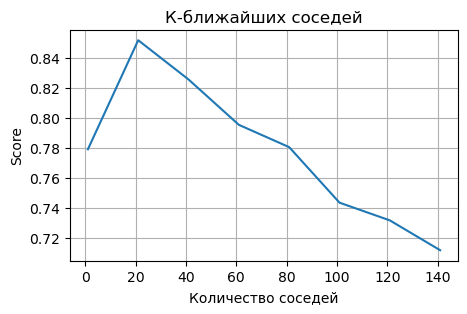

In [37]:
pipeline_model_knc = Pipeline([("transformer", tfidf_transformer_1), ("model", knc_model_task3)])
knc_model_grid = GridSearchCV(pipeline_model_knc, knc_params, cv=kf, scoring='balanced_accuracy')
knc_model_grid.fit(x_train, y_train);

best_accur_ngram1_knc = max(knc_model_grid.cv_results_['mean_test_score'])
best_param_ngram1_knc = knc_params['model__n_neighbors'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram1_knc = knc_model_grid.cv_results_['mean_fit_time'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = knc_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram1_knc = end_fit - start_fit
recall_ngram1_knc = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram1_knc = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram1_knc = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("К-ближайших соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Score")
plt.plot(knc_params['model__n_neighbors'],knc_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода К-ближайших соседей при ngram = (1,1)-',best_accur_ngram1_knc)
print('Лучший параметр модели К-ближайших соседей при ngram = (1,1)-',best_param_ngram1_knc)
print('Время обучения лучшей модели', best_fit_time_ngram1_knc,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram1_knc, 'c')

Создадим пайплайн для метода Логистическая регрессия и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Логистическая регрессия при ngram = (1,1)- 0.9553900559219886
Лучший параметр модели Логистическая регрессия при ngram = (1,1)- 193069772.88832456
Время обучения лучшей модели 0.19775986671447754 с
Время предсказания лучшей модели 0.03648099999999488 c


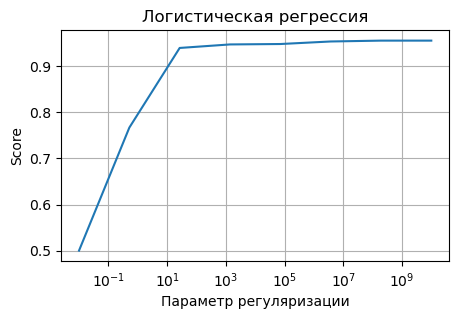

In [38]:
pipeline_model_logr = Pipeline([("transformer", tfidf_transformer_1), ("model", logr_model_task3)])
logr_model_grid = GridSearchCV(pipeline_model_logr, logr_params, cv=kf, scoring='balanced_accuracy')
logr_model_grid.fit(x_train, y_train);

best_accur_ngram1_logr = max(logr_model_grid.cv_results_['mean_test_score'])
best_param_ngram1_logr = logr_params['model__C'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram1_logr = logr_model_grid.cv_results_['mean_fit_time'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = logr_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram1_logr = end_fit - start_fit
recall_ngram1_logr = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram1_logr = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram1_logr = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Логистическая регрессия")
plt.xlabel("Параметр регуляризации")
plt.ylabel("Score")
plt.plot(logr_params['model__C'],logr_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Логистическая регрессия при ngram = (1,1)-',best_accur_ngram1_logr)
print('Лучший параметр модели Логистическая регрессия при ngram = (1,1)-',best_param_ngram1_logr)
print('Время обучения лучшей модели', best_fit_time_ngram1_logr,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram1_logr, 'c')

Создадим пайплайн для метода Наивный Байес: модель Бернулли и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (1,1)- 0.9598606992975551
Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (1,1)- 0.07196856730011521
Время обучения лучшей модели 0.11073684692382812 с
Время предсказания лучшей модели 0.04383059999999972 c


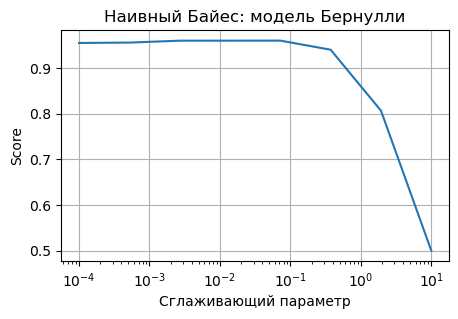

In [39]:
pipeline_model_bnb = Pipeline([("transformer", count_vectorizer_1), ("model", bnb_model_task3)])
bnb_model_grid = GridSearchCV(pipeline_model_bnb, bnb_params, cv=kf, scoring='balanced_accuracy')
bnb_model_grid.fit(x_train, y_train);

best_accur_ngram1_bnb = max(bnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram1_bnb = bnb_params['model__alpha'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram1_bnb = bnb_model_grid.cv_results_['mean_fit_time'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = bnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram1_bnb = end_fit - start_fit
recall_ngram1_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram1_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram1_bnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: модель Бернулли")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(bnb_params['model__alpha'],bnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (1,1)-',best_accur_ngram1_bnb)
print('Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (1,1)-',best_param_ngram1_bnb)
print('Время обучения лучшей модели', best_fit_time_ngram1_bnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram1_bnb, 'c')

Создадим пайплайн для метода Наивный Байес: полиномиальная модель и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,1)- 0.951289236150143
Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,1)- 0.013894954943731374
Время обучения лучшей модели 0.12125951051712036 с
Время предсказания лучшей модели 0.04029239999999845 c


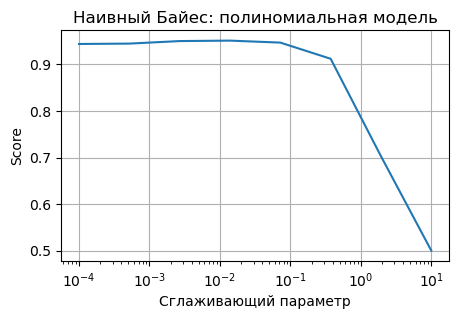

In [40]:
pipeline_model_mnb = Pipeline([("transformer", tfidf_transformer_1), ("model", mnb_model_task3)])
mnb_model_grid = GridSearchCV(pipeline_model_mnb, mnb_params, cv=kf, scoring='balanced_accuracy')
mnb_model_grid.fit(x_train, y_train);

best_accur_ngram1_mnb = max(mnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram1_mnb = mnb_params['model__alpha'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram1_mnb = mnb_model_grid.cv_results_['mean_fit_time'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = mnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram1_mnb = end_fit - start_fit
recall_ngram1_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram1_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram1_mnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: полиномиальная модель")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(mnb_params['model__alpha'],mnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,1)-',best_accur_ngram1_mnb)
print('Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,1)-',best_param_ngram1_mnb)
print('Время обучения лучшей модели', best_fit_time_ngram1_mnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram1_mnb, 'c')

Определим векторизацию для n-gram = 2

In [41]:
tfidf_transformer_2 = TfidfVectorizer(lowercase=True, use_idf=True, 
                                    ngram_range=(2,2), smooth_idf=False)
count_vectorizer_2 = CountVectorizer(analyzer="word", ngram_range=(2,2),
                                   lowercase=True, binary=True)

Создадим пайплайн для метода К-ближайших соседей(KNeighbors) и используем GridSearch для определения лучшей модели

Наилучшая точность для метода К-ближайших соседей при ngram = (2,2)- 0.7477214243679202
Лучший параметр модели К-ближайших соседей при ngram = (2,2)- 1
Время обучения лучшей модели 0.2641218900680542 с
Время предсказания лучшей модели 0.23263839999999902 c


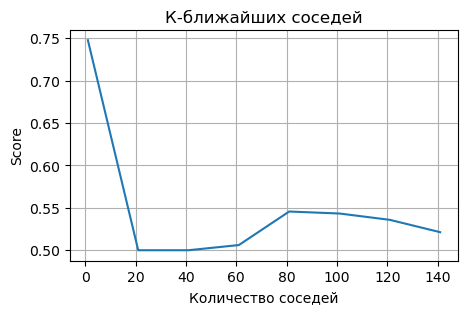

In [42]:
pipeline_model_knc = Pipeline([("transformer", tfidf_transformer_2), ("model", knc_model_task3)])
knc_model_grid = GridSearchCV(pipeline_model_knc, knc_params, cv=kf, scoring='balanced_accuracy')
knc_model_grid.fit(x_train, y_train);

best_accur_ngram2_knc = max(knc_model_grid.cv_results_['mean_test_score'])
best_param_ngram2_knc = knc_params['model__n_neighbors'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram2_knc = knc_model_grid.cv_results_['mean_fit_time'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = knc_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram2_knc = end_fit - start_fit
recall_ngram2_knc = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram2_knc = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram2_knc = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("К-ближайших соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Score")
plt.plot(knc_params['model__n_neighbors'],knc_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода К-ближайших соседей при ngram = (2,2)-',best_accur_ngram2_knc)
print('Лучший параметр модели К-ближайших соседей при ngram = (2,2)-',best_param_ngram2_knc)
print('Время обучения лучшей модели', best_fit_time_ngram2_knc,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram2_knc, 'c')

Создадим пайплайн для метода Логистическая регрессия и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Логистическая регрессия при ngram = (2,2)- 0.9308387711286525
Лучший параметр модели Логистическая регрессия при ngram = (2,2)- 193069772.88832456
Время обучения лучшей модели 0.6216779351234436 с
Время предсказания лучшей модели 0.050982300000001146 c


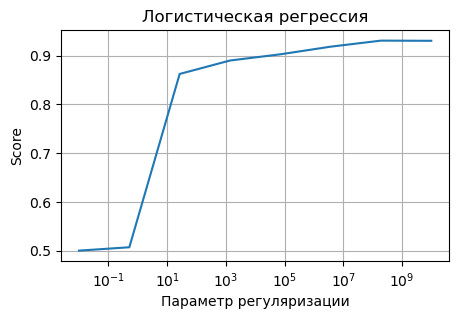

In [43]:
pipeline_model_logr = Pipeline([("transformer", tfidf_transformer_2), ("model", logr_model_task3)])
logr_model_grid = GridSearchCV(pipeline_model_logr, logr_params, cv=kf, scoring='balanced_accuracy')
logr_model_grid.fit(x_train, y_train);

best_accur_ngram2_logr = max(logr_model_grid.cv_results_['mean_test_score'])
best_param_ngram2_logr = logr_params['model__C'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram2_logr = logr_model_grid.cv_results_['mean_fit_time'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = logr_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram2_logr = end_fit - start_fit
recall_ngram2_logr = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram2_logr = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram2_logr = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Логистическая регрессия")
plt.xlabel("Параметр регуляризации")
plt.ylabel("Score")
plt.plot(logr_params['model__C'],logr_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Логистическая регрессия при ngram = (2,2)-',best_accur_ngram2_logr)
print('Лучший параметр модели Логистическая регрессия при ngram = (2,2)-',best_param_ngram2_logr)
print('Время обучения лучшей модели', best_fit_time_ngram2_logr,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram2_logr, 'c')

Создадим пайплайн для метода Наивный Байес: модель Бернулли и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (2,2)- 0.9186347913351878
Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (2,2)- 0.0001
Время обучения лучшей модели 0.2501957416534424 с
Время предсказания лучшей модели 0.05234390000001099 c


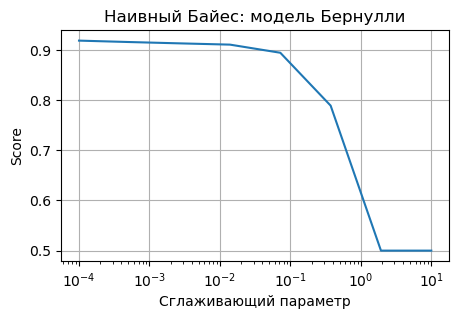

In [44]:
pipeline_model_bnb = Pipeline([("transformer", count_vectorizer_2), ("model", bnb_model_task3)])
bnb_model_grid = GridSearchCV(pipeline_model_bnb, bnb_params, cv=kf, scoring='balanced_accuracy')
bnb_model_grid.fit(x_train, y_train);

best_accur_ngram2_bnb = max(bnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram2_bnb = bnb_params['model__alpha'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram2_bnb = bnb_model_grid.cv_results_['mean_fit_time'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = bnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram2_bnb = end_fit - start_fit
recall_ngram2_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram2_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram2_bnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: модель Бернулли")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(bnb_params['model__alpha'],bnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (2,2)-',best_accur_ngram2_bnb)
print('Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (2,2)-',best_param_ngram2_bnb)
print('Время обучения лучшей модели', best_fit_time_ngram2_bnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram2_bnb, 'c')

Создадим пайплайн для метода Наивный Байес: полиномиальная модель и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,1)- 0.9339291217032798
Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,1)- 0.002682695795279727
Время обучения лучшей модели 0.22729480266571045 с
Время предсказания лучшей модели 0.06254749999999376 c


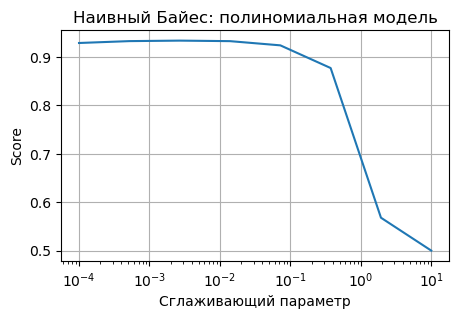

In [45]:
pipeline_model_mnb = Pipeline([("transformer", tfidf_transformer_2), ("model", mnb_model_task3)])
mnb_model_grid = GridSearchCV(pipeline_model_mnb, mnb_params, cv=kf, scoring='balanced_accuracy')
mnb_model_grid.fit(x_train, y_train);

best_accur_ngram2_mnb = max(mnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram2_mnb = mnb_params['model__alpha'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram2_mnb = mnb_model_grid.cv_results_['mean_fit_time'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = mnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram2_mnb = end_fit - start_fit
recall_ngram2_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram2_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram2_mnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: полиномиальная модель")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(mnb_params['model__alpha'],mnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,1)-',best_accur_ngram2_mnb)
print('Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,1)-',best_param_ngram2_mnb)
print('Время обучения лучшей модели', best_fit_time_ngram2_mnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram2_mnb, 'c')

Определим векторизацию для n-gram = (1,2)

In [46]:
tfidf_transformer_12 = TfidfVectorizer(lowercase=True, use_idf=True, 
                                    ngram_range=(1,2), smooth_idf=False)
count_vectorizer_12 = CountVectorizer(analyzer="word", ngram_range=(1,2),
                                   lowercase=True, binary=True)

Создадим пайплайн для метода К-ближайших соседей(KNeighbors) и используем GridSearch для определения лучшей модели

Наилучшая точность для метода К-ближайших соседей при ngram = (1,2)- 0.8709749123659903
Лучший параметр модели К-ближайших соседей при ngram = (1,2)- 21
Время обучения лучшей модели 0.2921826243400574 с
Время предсказания лучшей модели 0.210899100000006 c


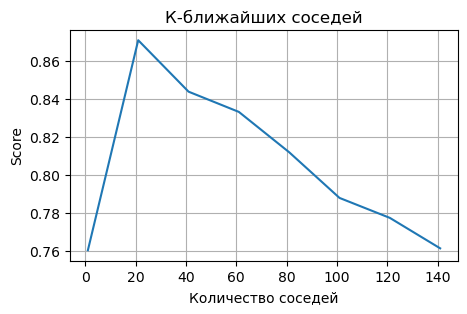

In [47]:
pipeline_model_knc = Pipeline([("transformer", tfidf_transformer_12), ("model", knc_model_task3)])
knc_model_grid = GridSearchCV(pipeline_model_knc, knc_params, cv=kf, scoring='balanced_accuracy')
knc_model_grid.fit(x_train, y_train);

best_accur_ngram12_knc = max(knc_model_grid.cv_results_['mean_test_score'])
best_param_ngram12_knc = knc_params['model__n_neighbors'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram12_knc = knc_model_grid.cv_results_['mean_fit_time'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = knc_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram12_knc = end_fit - start_fit
recall_ngram12_knc = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram12_knc = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram12_knc = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("К-ближайших соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Score")
plt.plot(knc_params['model__n_neighbors'],knc_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода К-ближайших соседей при ngram = (1,2)-',best_accur_ngram12_knc)
print('Лучший параметр модели К-ближайших соседей при ngram = (1,2)-',best_param_ngram12_knc)
print('Время обучения лучшей модели', best_fit_time_ngram12_knc,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram12_knc, 'c')

Создадим пайплайн для метода Логистическая регрессия и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Логистическая регрессия при ngram = (1,2)- 0.9658444413903238
Лучший параметр модели Логистическая регрессия при ngram = (1,2)- 193069772.88832456
Время обучения лучшей модели 0.4090237021446228 с
Время предсказания лучшей модели 0.040584300000006124 c


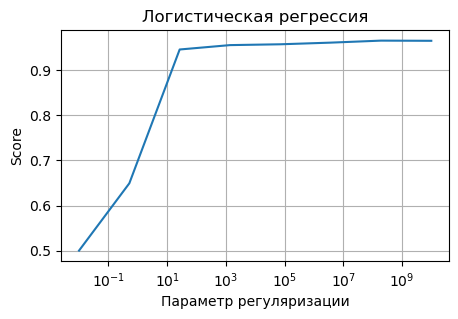

In [48]:
pipeline_model_logr = Pipeline([("transformer", tfidf_transformer_12), ("model", logr_model_task3)])
logr_model_grid = GridSearchCV(pipeline_model_logr, logr_params, cv=kf, scoring='balanced_accuracy')
logr_model_grid.fit(x_train, y_train);

best_accur_ngram12_logr = max(logr_model_grid.cv_results_['mean_test_score'])
best_param_ngram12_logr = logr_params['model__C'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram12_logr = logr_model_grid.cv_results_['mean_fit_time'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = logr_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram12_logr = end_fit - start_fit
recall_ngram12_logr = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram12_logr = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram12_logr = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Логистическая регрессия")
plt.xlabel("Параметр регуляризации")
plt.ylabel("Score")
plt.plot(logr_params['model__C'],logr_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Логистическая регрессия при ngram = (1,2)-',best_accur_ngram12_logr)
print('Лучший параметр модели Логистическая регрессия при ngram = (1,2)-',best_param_ngram12_logr)
print('Время обучения лучшей модели', best_fit_time_ngram12_logr,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram12_logr, 'c')

Создадим пайплайн для метода Наивный Байес: модель Бернулли и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (1,2)- 0.949719542739526
Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (1,2)- 0.0005179474679231213
Время обучения лучшей модели 0.15986448526382446 с
Время предсказания лучшей модели 0.04541679999999815 c


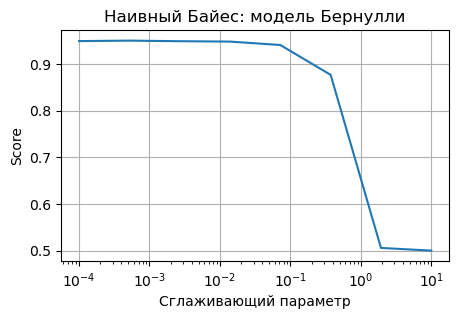

In [49]:
pipeline_model_bnb = Pipeline([("transformer", count_vectorizer_12), ("model", bnb_model_task3)])
bnb_model_grid = GridSearchCV(pipeline_model_bnb, bnb_params, cv=kf, scoring='balanced_accuracy')
bnb_model_grid.fit(x_train, y_train);

best_accur_ngram12_bnb = max(bnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram12_bnb = bnb_params['model__alpha'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram12_bnb = bnb_model_grid.cv_results_['mean_fit_time'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = bnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram12_bnb = end_fit - start_fit
recall_ngram12_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram12_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram12_bnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: модель Бернулли")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(bnb_params['model__alpha'],bnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: модель Бернулли при ngram = (1,2)-',best_accur_ngram12_bnb)
print('Лучший параметр модели Наивный Байес: модель Бернулли при ngram = (1,2)-',best_param_ngram12_bnb)
print('Время обучения лучшей модели', best_fit_time_ngram12_bnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram12_bnb, 'c')

Создадим пайплайн для метода Наивный Байес: полиномиальная модель и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,2)- 0.9571326764547252
Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,2)- 0.013894954943731374
Время обучения лучшей модели 0.19231665134429932 с
Время предсказания лучшей модели 0.044402700000006234 c


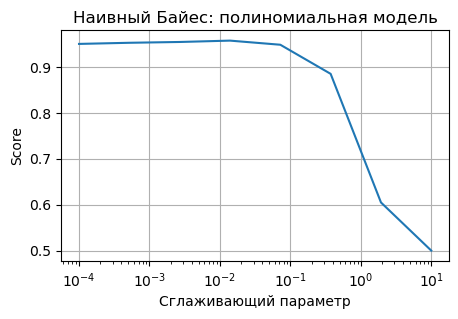

In [50]:
pipeline_model_mnb = Pipeline([("transformer", tfidf_transformer_12), ("model", mnb_model_task3)])
mnb_model_grid = GridSearchCV(pipeline_model_mnb, mnb_params, cv=kf, scoring='balanced_accuracy')
mnb_model_grid.fit(x_train, y_train);

best_accur_ngram12_mnb = max(mnb_model_grid.cv_results_['mean_test_score'])
best_param_ngram12_mnb = mnb_params['model__alpha'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_ngram12_mnb = mnb_model_grid.cv_results_['mean_fit_time'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = mnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_ngram12_mnb = end_fit - start_fit
recall_ngram12_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_ngram12_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_ngram12_mnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.xscale('log')
plt.title("Наивный Байес: полиномиальная модель")
plt.xlabel("Cглаживающий параметр")
plt.ylabel("Score")
plt.plot(mnb_params['model__alpha'],mnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: полиномиальная модель при ngram = (1,2)-',best_accur_ngram12_mnb)
print('Лучший параметр модели Наивный Байес: полиномиальная модель при ngram = (1,2)-',best_param_ngram12_mnb)
print('Время обучения лучшей модели', best_fit_time_ngram12_mnb,'с')
print('Время предсказания лучшей модели', best_predict_time_ngram12_mnb, 'c')

In [51]:
table_data_task3 = {'Значение параметра модели': [best_param_ngram1_knc, best_param_ngram1_logr, best_param_ngram1_bnb, best_param_ngram1_mnb, 
                                                  best_param_ngram2_knc, best_param_ngram2_logr, best_param_ngram2_bnb, best_param_ngram2_mnb,
                                                  best_param_ngram12_knc, best_param_ngram12_logr, best_param_ngram12_bnb, best_param_ngram2_mnb], 
              'Время обучения, с': [best_fit_time_ngram1_knc, best_fit_time_ngram1_logr, best_fit_time_ngram1_bnb, best_fit_time_ngram1_mnb,
                                    best_fit_time_ngram2_knc, best_fit_time_ngram2_logr, best_fit_time_ngram2_bnb, best_fit_time_ngram2_mnb,
                                    best_fit_time_ngram12_knc, best_fit_time_ngram12_logr, best_fit_time_ngram12_bnb, best_fit_time_ngram12_mnb],
              'Время предсказания, c': [best_predict_time_ngram1_knc, best_predict_time_ngram1_logr, best_predict_time_ngram1_bnb, best_predict_time_ngram1_mnb,
                                        best_predict_time_ngram2_knc, best_predict_time_ngram2_logr, best_predict_time_ngram2_bnb, best_predict_time_ngram2_mnb,
                                        best_predict_time_ngram12_knc, best_predict_time_ngram12_logr, best_predict_time_ngram12_bnb, best_predict_time_ngram12_mnb],
              'Balanced accuracy score': [best_accur_ngram1_knc, best_accur_ngram1_logr, best_accur_ngram1_bnb, best_accur_ngram1_mnb,
                                          best_accur_ngram2_knc, best_accur_ngram2_logr, best_accur_ngram2_bnb, best_accur_ngram2_mnb,
                                          best_accur_ngram12_knc, best_accur_ngram12_logr, best_accur_ngram12_bnb, best_accur_ngram12_mnb], 
              'Recall score': [recall_ngram1_knc, recall_ngram1_logr, recall_ngram1_bnb, recall_ngram1_mnb,
                               recall_ngram2_knc, recall_ngram2_logr, recall_ngram2_bnb, recall_ngram2_mnb,
                               recall_ngram12_knc, recall_ngram12_logr, recall_ngram12_bnb, recall_ngram12_mnb],
              'Precision score': [precision_ngram1_knc, precision_ngram1_logr, precision_ngram1_bnb, precision_ngram1_mnb,
                                  precision_ngram2_knc, precision_ngram2_logr, precision_ngram2_bnb, precision_ngram2_mnb,
                                  precision_ngram12_knc, precision_ngram12_logr, precision_ngram12_bnb, precision_ngram12_mnb],
              'F1 score': [f1_ngram1_knc, f1_ngram1_logr, f1_ngram1_bnb, f1_ngram1_mnb,
                           f1_ngram2_knc, f1_ngram2_logr, f1_ngram2_bnb, f1_ngram2_mnb,
                           f1_ngram12_knc, f1_ngram12_logr, f1_ngram12_bnb, f1_ngram12_mnb]}
indexes = ['К-ближайших соседей(KNeighbors) N-gram = 1', 'Логистическая регрессия N-gram = 1', 'Наивный Байес: модель Бернулли N-gram = 1', 
           'Наивный Байес: полиномиальная модель N-gram = 1', 'К-ближайших соседей(KNeighbors) N-gram = 2', 'Логистическая регрессия N-gram = 2', 
           'Наивный Байес: модель Бернулли N-gram = 2', 'Наивный Байес: полиномиальная модель N-gram = 2', 
           'К-ближайших соседей(KNeighbors) N-gram = (1,2)', 'Логистическая регрессия N-gram = (1,2)', 
           'Наивный Байес: модель Бернулли N-gram = (1,2)', 'Наивный Байес: полиномиальная модель N-gram = (1,2)' ]
df_table_task3 = pd.DataFrame(data=table_data_task3, index = indexes)

In [52]:
display(df_table_task3)

,Значение параметра модели,"Время обучения, с","Время предсказания, c",Balanced accuracy score,Recall score,Precision score,F1 score
К-ближайших соседей(KNeighbors) N-gram = 1,2.100000e+01,0.109675,0.431324,0.851780,0.652406,0.983871,0.784566
Логистическая регрессия N-gram = 1,1.930698e+08,0.197760,0.036481,0.955390,0.925134,0.961111,0.942779
Наивный Байес: модель Бернулли N-gram = 1,7.196857e-02,0.110737,0.043831,0.959861,0.898396,1.000000,0.946479
Наивный Байес: полиномиальная модель N-gram = 1,1.389495e-02,0.121260,0.040292,0.951289,0.898396,0.988235,0.941176
К-ближайших соседей(KNeighbors) N-gram = 2,1.000000e+00,0.264122,0.232638,0.747721,0.588235,1.000000,0.740741
Логистическая регрессия N-gram = 2,1.930698e+08,0.621678,0.050982,0.930839,0.935829,0.764192,0.841346
Наивный Байес: модель Бернулли N-gram = 2,1.000000e-04,0.250196,0.052344,0.918635,0.898396,0.965517,0.930748
Наивный Байес: полиномиальная модель N-gram = 2,2.682696e-03,0.227295,0.062547,0.933929,0.909091,0.939227,0.923913
"К-ближайших соседей(KNeighbors) N-gram = (1,2)",2.100000e+01,0.292183,0.210899,0.870975,0.663102,0.968750,0.787302
"Логистическая регрессия N-gram = (1,2)",1.930698e+08,0.409024,0.040584,0.965844,0.941176,0.931217,0.936170


Выводы:
 Дольше всего обучается и предсказывает модель логистической регрессии, самое долгое предсказание у модели K-ближайших соседей. Почти все модели кроме K-ближних соседей предсказывают быстрее чем обучаются. Самое быстрое предсказание - у модели Бернулли. Видно, что при ngram = 2  - точность всех моделей ниже по сравнению с ngram = 1, а при ngram = (1,2) выше чем при ngram = 1, таким образом, наилучшая точность при ngram = (1,2). При всех значения ngram видно, что наилучшая точнсть у моделей Наивный Байес, а также лог. регрессии, модель K-ближайших соседей отличается в худшую сторону, показывая наименьшую точность по всем метрикам по сравнению с другими.

## Задание 4. Оценка влияния количества признаков FeatureHasher на качество классификации


Как будет меняться качество классификации для обозначенных ранее методов при использовании `FeatureHasher` (или `HashingVectorizer`) из пакета `sklearn` перед TF-IDF преобразованием.

Количество признаков: `np.logspace(1, 5, 5, base=10)`

In [53]:
knc_model_task4 = KNeighborsClassifier(n_neighbors = best_param_ngram1_knc)
logr_model_task4 = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100,
                                solver="lbfgs", random_state=123, C = best_param_ngram1_logr)
bnb_model_task4 = BernoulliNB(binarize=None, alpha = best_param_ngram1_bnb)
mnb_model_task4 = MultinomialNB(alpha = best_param_ngram1_mnb)

In [54]:
tfidf_transformer_task4 = TfidfVectorizer(use_idf=True, 
                                    ngram_range=(1,1), smooth_idf=False)
count_vectorizer_task4 = CountVectorizer(analyzer="word", ngram_range=(1,1),
                                   lowercase=True, binary=True)
hv_transformer = HashingVectorizer(alternate_sign=False, norm=None)

In [55]:
print(hv_transformer.get_params().keys(), '- ключи FeatureHasher') 
# для дальнейшего использования gridsearch
hv_params = {"transformer_hv__n_features": np.logspace(1, 5, 5, base=10).astype(int)} 
#astype для того чтобы сделать int, т.к. ключ n_features принимает только int тип данных

dict_keys(['alternate_sign', 'analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'n_features', 'ngram_range', 'norm', 'preprocessor', 'stop_words', 'strip_accents', 'token_pattern', 'tokenizer']) - ключи FeatureHasher


Создадим пайплайн для метода К-ближайших соседей(KNeighbors) и используем GridSearch для определения лучшей модели

Из условия - "перед TF-IDF преобразованием", не совсем понятно как последовательно сделать две векторизации, после поиска в интернете решаю использовать **вместо** TF-IDF преобразования - HashingVectorizer

Наилучшая точность для метода К-ближайших соседей 0.6830304004961841
Лучший параметр количества признаков для модели К-ближайших соседей 10
Время обучения лучшей модели 0.053739845752716064 с
Время предсказания лучшей модели 0.40886250000002633 c


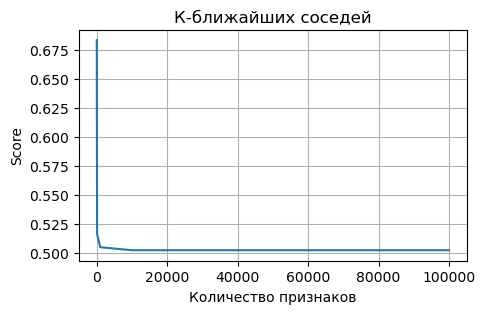

In [56]:
pipeline_model_knc = Pipeline([("transformer_hv", hv_transformer), ("model", knc_model_task4)])

knc_model_grid = GridSearchCV(pipeline_model_knc, hv_params, cv=kf, scoring='balanced_accuracy')
knc_model_grid.fit(x_train, y_train);

best_accur_knc = max(knc_model_grid.cv_results_['mean_test_score'])
best_param_knc = hv_params['transformer_hv__n_features'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
best_fit_time_knc = knc_model_grid.cv_results_['mean_fit_time'][np.argmax(knc_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = knc_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_knc = end_fit - start_fit
recall_knc = recall_score(y_test, y_pred, pos_label = 'spam')
precision_knc = precision_score(y_test, y_pred, pos_label = 'spam')
f1_knc = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("К-ближайших соседей")
plt.xlabel("Количество признаков")
plt.ylabel("Score")
plt.plot(hv_params['transformer_hv__n_features'],knc_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода К-ближайших соседей',best_accur_knc)
print('Лучший параметр количества признаков для модели К-ближайших соседей',best_param_knc)
print('Время обучения лучшей модели', best_fit_time_knc,'с')
print('Время предсказания лучшей модели', best_predict_time_knc, 'c')

Создадим пайплайн для метода Логистическая регрессия и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Логистическая регрессия 0.9459481142835637
Лучший параметр количества признаков для модели Логистическая регрессия 10000
Время обучения лучшей модели 0.1190720796585083 с
Время предсказания лучшей модели 0.022659799999985353 c


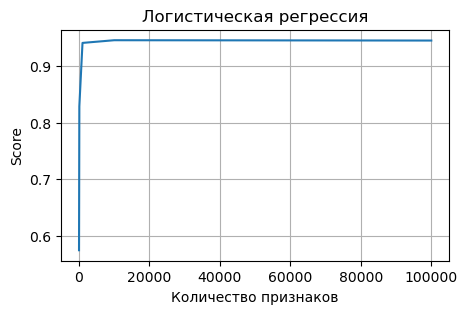

In [57]:
pipeline_model_logr = Pipeline([("transformer_hv", hv_transformer), ("model", logr_model_task4)])

logr_model_grid = GridSearchCV(pipeline_model_logr, hv_params, cv=kf, scoring='balanced_accuracy')
logr_model_grid.fit(x_train, y_train);

best_accur_logr = max(logr_model_grid.cv_results_['mean_test_score'])
best_param_logr = hv_params['transformer_hv__n_features'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
best_fit_time_logr = logr_model_grid.cv_results_['mean_fit_time'][np.argmax(logr_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = logr_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_logr = end_fit - start_fit
recall_logr = recall_score(y_test, y_pred, pos_label = 'spam')
precision_logr = precision_score(y_test, y_pred, pos_label = 'spam')
f1_logr = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("Логистическая регрессия")
plt.xlabel("Количество признаков")
plt.ylabel("Score")
plt.plot(hv_params['transformer_hv__n_features'],logr_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Логистическая регрессия',best_accur_logr)
print('Лучший параметр количества признаков для модели Логистическая регрессия',best_param_logr)
print('Время обучения лучшей модели', best_fit_time_logr,'с')
print('Время предсказания лучшей модели', best_predict_time_logr, 'c')

Создадим пайплайн для метода Наивный Байес: модель Бернулли и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: модель Бернулли 0.9531339339954086
Лучший параметр количества признаков для модели Наивный Байес: модель Бернулли 10000
Время обучения лучшей модели 0.040734052658081055 с
Время предсказания лучшей модели 0.017401400000011336 c


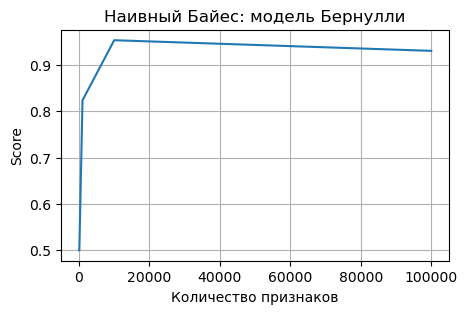

In [58]:
pipeline_model_bnb = Pipeline([("transformer_hv", hv_transformer), ("model", bnb_model_task4)])

bnb_model_grid = GridSearchCV(pipeline_model_bnb, hv_params, cv=kf, scoring='balanced_accuracy')
bnb_model_grid.fit(x_train, y_train);

best_accur_bnb = max(bnb_model_grid.cv_results_['mean_test_score'])
best_param_bnb = hv_params['transformer_hv__n_features'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_bnb = bnb_model_grid.cv_results_['mean_fit_time'][np.argmax(bnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = bnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_bnb = end_fit - start_fit
recall_bnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_bnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_bnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("Наивный Байес: модель Бернулли")
plt.xlabel("Количество признаков")
plt.ylabel("Score")
plt.plot(hv_params['transformer_hv__n_features'],bnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: модель Бернулли',best_accur_bnb)
print('Лучший параметр количества признаков для модели Наивный Байес: модель Бернулли',best_param_bnb)
print('Время обучения лучшей модели', best_fit_time_bnb,'с')
print('Время предсказания лучшей модели', best_predict_time_bnb, 'c')

Создадим пайплайн для метода Наивный Байес: полиномиальная модель и используем GridSearch для определения лучшей модели

Наилучшая точность для метода Наивный Байес: полиномиальная модель 0.9611502022373917
Лучший параметр количества признаков для модели Наивный Байес: полиномиальная модель 100000
Время обучения лучшей модели 0.04613584280014038 с
Время предсказания лучшей модели 0.018845700000014176 c


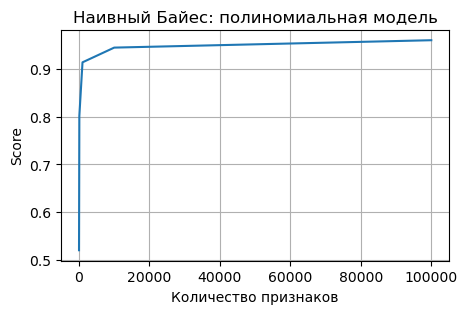

In [59]:
pipeline_model_mnb = Pipeline([("transformer_hv", hv_transformer), ("model", mnb_model_task4)])

mnb_model_grid = GridSearchCV(pipeline_model_mnb, hv_params, cv=kf, scoring='balanced_accuracy')
mnb_model_grid.fit(x_train, y_train);

best_accur_mnb = max(mnb_model_grid.cv_results_['mean_test_score'])
best_param_mnb = hv_params['transformer_hv__n_features'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
best_fit_time_mnb = mnb_model_grid.cv_results_['mean_fit_time'][np.argmax(mnb_model_grid.cv_results_['mean_test_score'])]
start_fit = time.perf_counter()
y_pred = mnb_model_grid.best_estimator_.predict(x_test)
end_fit = time.perf_counter()
best_predict_time_mnb = end_fit - start_fit
recall_mnb = recall_score(y_test, y_pred, pos_label = 'spam')
precision_mnb = precision_score(y_test, y_pred, pos_label = 'spam')
f1_mnb = f1_score(y_test, y_pred, pos_label = 'spam')

plt.figure(figsize=[5, 3])
plt.title("Наивный Байес: полиномиальная модель")
plt.xlabel("Количество признаков")
plt.ylabel("Score")
plt.plot(hv_params['transformer_hv__n_features'],mnb_model_grid.cv_results_['mean_test_score'])
plt.grid(True)

print('Наилучшая точность для метода Наивный Байес: полиномиальная модель',best_accur_mnb)
print('Лучший параметр количества признаков для модели Наивный Байес: полиномиальная модель',best_param_mnb)
print('Время обучения лучшей модели', best_fit_time_mnb,'с')
print('Время предсказания лучшей модели', best_predict_time_mnb, 'c')

Создам таблицу сравнения для n-gram = 1 для TF-IDF преобразования и для HashingVectorizer

In [60]:
table_data_task4 = {
              'Время обучения, с': [best_fit_time_ngram1_knc, best_fit_time_ngram1_logr, best_fit_time_ngram1_bnb, best_fit_time_ngram1_mnb,
                                    best_fit_time_knc, best_fit_time_logr, best_fit_time_bnb, best_fit_time_mnb],
              'Время предсказания, c': [best_predict_time_ngram1_knc, best_predict_time_ngram1_logr, best_predict_time_ngram1_bnb, best_predict_time_ngram1_mnb,
                                        best_predict_time_knc, best_predict_time_logr, best_predict_time_bnb, best_predict_time_mnb],
              'Balanced accuracy score': [best_accur_ngram1_knc, best_accur_ngram1_logr, best_accur_ngram1_bnb, best_accur_ngram1_mnb,
                                          best_accur_knc, best_accur_logr, best_accur_bnb, best_accur_mnb], 
              'Recall score': [recall_ngram1_knc, recall_ngram1_logr, recall_ngram1_bnb, recall_ngram1_mnb,
                               recall_knc, recall_logr, recall_bnb, recall_mnb],
              'Precision score': [precision_ngram1_knc, precision_ngram1_logr, precision_ngram1_bnb, precision_ngram1_mnb,
                                  precision_knc, precision_logr, precision_bnb, precision_mnb],
              'F1 score': [f1_ngram1_knc, f1_ngram1_logr, f1_ngram1_bnb, f1_ngram1_mnb,
                           f1_knc, f1_logr, f1_bnb, f1_mnb]}
indexes = ['К-ближайших соседей(KNeighbors) TF-IDF', 'Логистическая регрессия TF-IDF', 'Наивный Байес: модель Бернулли TF-IDF', 
           'Наивный Байес: полиномиальная модель TF-IDF', 'К-ближайших соседей(KNeighbors) HV', 'Логистическая регрессия HV', 
           'Наивный Байес: модель Бернулли HV', 'Наивный Байес: полиномиальная модель HV']
df_table_task4 = pd.DataFrame(data=table_data_task4, index = indexes)

In [61]:
display(df_table_task4)

,"Время обучения, с","Время предсказания, c",Balanced accuracy score,Recall score,Precision score,F1 score
К-ближайших соседей(KNeighbors) TF-IDF,0.109675,0.431324,0.851780,0.652406,0.983871,0.784566
Логистическая регрессия TF-IDF,0.197760,0.036481,0.955390,0.925134,0.961111,0.942779
Наивный Байес: модель Бернулли TF-IDF,0.110737,0.043831,0.959861,0.898396,1.000000,0.946479
Наивный Байес: полиномиальная модель TF-IDF,0.121260,0.040292,0.951289,0.898396,0.988235,0.941176
К-ближайших соседей(KNeighbors) HV,0.053740,0.408863,0.683030,0.422460,0.622047,0.503185
Логистическая регрессия HV,0.119072,0.022660,0.945948,0.909091,0.971429,0.939227
Наивный Байес: модель Бернулли HV,0.040734,0.017401,0.953134,0.925134,0.977401,0.950549
Наивный Байес: полиномиальная модель HV,0.046136,0.018846,0.961150,0.941176,0.956522,0.948787


Из таблицы видно, что  обучение и предсказание после использования HashingVectorizer происходит чуть дольше, при этом модель К-ближайших соседей показывает ощутимо себя хуже при использовании HashingVectorizer, метрики модели логистической регрессии падают в среднем на 2-3%, а модели бернули и полиноминальная - показывают результаты лучше, но также не с большим изменением в 1-2 %